In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data=pd.read_csv('Mall_Customers.csv')

In [26]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
X=data[['Annual Income (k$)','Spending Score (1-100)']]

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scalar=StandardScaler()

In [31]:
scaled_data=scalar.fit_transform(X)

In [32]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=2)
kmeans.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,2
,copy_x,True
,algorithm,'lloyd'


In [33]:
data['cluster']=kmeans.labels_

In [34]:
data.head(20)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2
5,6,Female,22,17,76,4
6,7,Female,35,18,6,2
7,8,Female,23,18,94,4
8,9,Male,64,19,3,2
9,10,Female,30,19,72,4


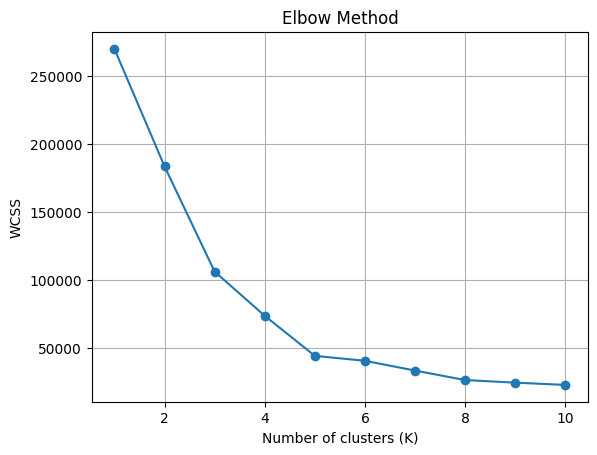

In [35]:
wcss = [] 
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42) 
    kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']]) 
    wcss.append(kmeans.inertia_) 

plt.plot(range(1, 11), wcss, marker='o') 
plt.title('Elbow Method') 
plt.xlabel('Number of clusters (K)') 
plt.ylabel('WCSS') 
plt.grid(True) 
plt.show()

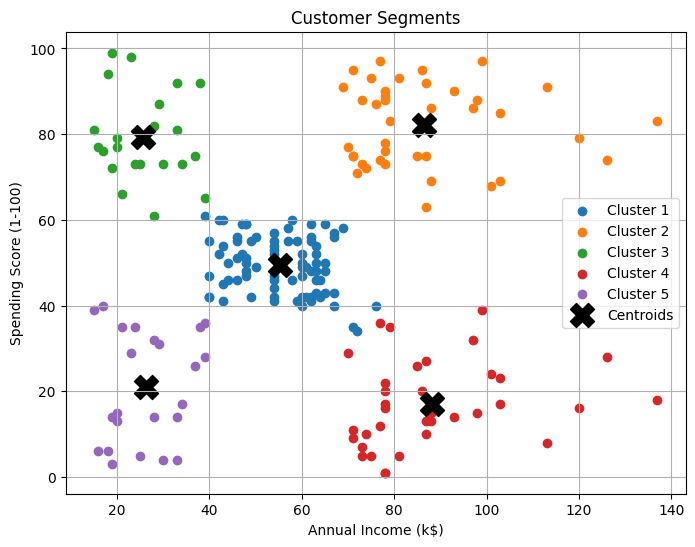

In [37]:
k_optimal = 5  # Example value from elbow method
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

plt.figure(figsize=(8, 6))
for i in range(k_optimal):
    plt.scatter(
        data.loc[clusters == i, 'Annual Income (k$)'],
        data.loc[clusters == i, 'Spending Score (1-100)'],
        label=f'Cluster {i+1}'
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300, c='black', marker='X', label='Centroids'
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
data['Cluster'] = clusters
summary = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(summary)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
